In [39]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import datetime
import pandas_datareader.data as web
import statsmodels.api as sm

In [40]:
# Stocks in the Electric Utilities Industry
stocks=['NEE','PCG','PNW', #rank 1
        'DUK','XEL','LNT', #rank 2
        'SO','ED','AES', #rank 3
        'AEP','ETR','OGE', #rank 4
       '^GSPC'] #sp500
df=yf.download(stocks, start="2017-01-01", end="2025-01-01",auto_adjust=True, interval='1mo')['Close']
prices=df
prices.head()

[*********************100%***********************]  13 of 13 completed


Ticker,AEP,AES,DUK,ED,ETR,LNT,NEE,OGE,PCG,PNW,SO,XEL,^GSPC
Date,,,,,,,,,,,,,
2017-01-01,47.783516,8.559611,55.768986,55.155281,22.284414,29.036833,25.224037,23.584263,60.267822,55.866531,34.805756,32.119232,2278.870117
2017-02-01,49.954147,8.711165,58.616371,57.150806,23.845945,30.709986,26.708281,26.132008,65.000443,59.657139,35.784523,33.977051,2363.639893
2017-03-01,50.539909,8.454063,58.877983,58.147507,23.918545,30.811106,26.372778,24.819384,64.620659,60.520901,35.462948,34.552269,2362.719971
2017-04-01,51.066917,8.552368,59.229805,59.360443,24.013016,30.585527,27.439028,24.677477,65.771172,61.762104,35.477188,35.310902,2384.199951
2017-05-01,54.040733,8.925699,61.512814,61.988564,24.894688,32.513927,29.057926,25.499577,67.075798,64.619057,36.054234,37.552612,2411.800049


In [41]:
# Calculate Monthly Returns
returns=prices.pct_change().dropna()
monthly_returns = returns.resample("ME").last().dropna()

# Then separate your columns:
aep_monthly = monthly_returns["AEP"]
aes_monthly = monthly_returns["AES"]
duk_monthly = monthly_returns["DUK"]
ed_monthly = monthly_returns["ED"]
etr_monthly = monthly_returns["ETR"]
lnt_monthly = monthly_returns["LNT"]
nee_monthly = monthly_returns["NEE"]
oge_monthly = monthly_returns["OGE"]
pcg_monthly = monthly_returns["PCG"]
pnw_monthly = monthly_returns["PNW"]
so_monthly = monthly_returns["SO"]
xel_monthly = monthly_returns["XEL"]
sp500_monthly = monthly_returns["^GSPC"]

# Now build a DataFrame:
df_monthly = pd.DataFrame({
    "AEP": aep_monthly,
    "AES": aes_monthly,
    "DUK": duk_monthly,
    "ED": ed_monthly,
    "ETR": etr_monthly,
    "LNT": lnt_monthly,
    "NEE": nee_monthly,
    "OGE": oge_monthly,
    "PCG": pcg_monthly,
    "PNW": pnw_monthly,
    "SO": so_monthly,
    "XEL": xel_monthly,
    "SP500": sp500_monthly
})
df_monthly.head()

,AEP,AES,DUK,ED,ETR,LNT,NEE,OGE,PCG,PNW,SO,XEL,SP500
Date,,,,,,,,,,,,,
2017-02-28,0.045426,0.017706,0.051057,0.036180,0.070073,0.057622,0.058842,0.108027,0.078526,0.067851,0.028121,0.057841,0.037198
2017-03-31,0.011726,-0.029514,0.004463,0.017440,0.003045,0.003293,-0.012562,-0.050231,-0.005843,0.014479,-0.008986,0.016930,-0.000389
2017-04-30,0.010428,0.011628,0.005975,0.020860,0.003950,-0.007321,0.040430,-0.005718,0.017804,0.020509,0.000402,0.021956,0.009091
2017-05-31,0.058234,0.043652,0.038545,0.044274,0.036716,0.063049,0.059000,0.033314,0.019836,0.046257,0.016265,0.063485,0.011576
2017-06-30,-0.023762,-0.048801,-0.014253,-0.015291,-0.006557,-0.031348,-0.002264,-0.023576,-0.029395,-0.036106,-0.042810,-0.042371,0.004814


In [42]:
df_monthly.columns

Index(['AEP', 'AES', 'DUK', 'ED', 'ETR', 'LNT', 'NEE', 'OGE', 'PCG', 'PNW',
       'SO', 'XEL', 'SP500'],
      dtype='object')

In [43]:
#Annual returns
# Create a DataFrame to store annual returns
annual_returns_df = pd.DataFrame()
stocks=['NEE','PCG','PNW', #rank 1
        'DUK','XEL','LNT', #rank 2
        'SO','ED','AES', #rank 3
        'AEP','ETR','OGE']
# Iterate over each stock
for stock in stocks:
    # Group by year and calculate the annual return
    annual_returns = (1 + df_monthly[stock]).resample('YE').prod() - 1
    # Add the results to the DataFrame
    annual_returns_df[stock] = annual_returns

# Display the annual returns for each year
print(annual_returns_df)

                 NEE       PCG       PNW       DUK       XEL       LNT  \
Date                                                                     
2017-12-31  0.297683 -0.258747  0.132553  0.116326  0.191798  0.167874   
2018-12-31  0.143038 -0.470221  0.035768  0.074159  0.058640  0.023698   
2019-12-31  0.426859 -0.542316  0.090628  0.102882  0.325368  0.334262   
2020-12-31  0.300643  0.146274 -0.076808  0.047715  0.077528 -0.031642   
2021-12-31  0.233926 -0.025682 -0.077750  0.191113  0.043749  0.228615   
2022-12-31 -0.085441  0.339374  0.130052  0.020265  0.064460 -0.074379   
2023-12-31 -0.252930  0.108856 -0.011787 -0.016264 -0.088159 -0.038379   
2024-12-31  0.214646  0.121766  0.234554  0.155598  0.132671  0.195384   

                  SO        ED       AES       AEP       ETR       OGE  
Date                                                                    
2017-12-31  0.019186  0.182264 -0.011583  0.188739  0.202438  0.016807  
2018-12-31 -0.037519 -0.066211  0.390206

In [44]:
# Annual CAGR
cagr_df = pd.DataFrame()

# Iterate over each stock
for stock in stocks:
    # Calculate CAGR for each year
    # CAGR formula: (end_value / start_value)^(1/n) - 1
    # Here, end_value is the annual return + 1, start_value is 1, and n is 1 year
    cagr = (annual_returns + 1) ** (1 / 1) - 1
    cagr_df[stock] = cagr

# Display CAGR for each year
print("\nCAGR for Each Year:\n", cagr_df)


CAGR for Each Year:
                  NEE       PCG       PNW       DUK       XEL       LNT  \
Date                                                                     
2017-12-31  0.016807  0.016807  0.016807  0.016807  0.016807  0.016807   
2018-12-31  0.239063  0.239063  0.239063  0.239063  0.239063  0.239063   
2019-12-31  0.175364  0.175364  0.175364  0.175364  0.175364  0.175364   
2020-12-31 -0.249040 -0.249040 -0.249040 -0.249040 -0.249040 -0.249040   
2021-12-31  0.265429  0.265429  0.265429  0.265429  0.265429  0.265429   
2022-12-31  0.075821  0.075821  0.075821  0.075821  0.075821  0.075821   
2023-12-31 -0.075416 -0.075416 -0.075416 -0.075416 -0.075416 -0.075416   
2024-12-31  0.236909  0.236909  0.236909  0.236909  0.236909  0.236909   

                  SO        ED       AES       AEP       ETR       OGE  
Date                                                                    
2017-12-31  0.016807  0.016807  0.016807  0.016807  0.016807  0.016807  
2018-12-31  0.2390

In [45]:
# 8 Year CAGR
cagr = {}

for stock in stocks:
    # Get the initial and final adjusted closing prices
    initial_price = prices[stock].iloc[0]
    final_price = prices[stock].iloc[-1]

    # Calculate CAGR
    n = 8  # Number of years
    cagr[stock] = (final_price / initial_price) ** (1 / n) - 1

# Convert the results to a DataFrame for better presentation
cagr_df = pd.DataFrame(list(cagr.items()), columns=['Stock', 'CAGR'])

print(cagr_df)

   Stock      CAGR
0    NEE  0.138309
1    PCG -0.127959
2    PNW  0.052143
3    DUK  0.084546
4    XEL  0.095048
5    LNT  0.091819
6     SO  0.112431
7     ED  0.060795
8    AES  0.050234
9    AEP  0.084411
10   ETR  0.164330
11   OGE  0.071021


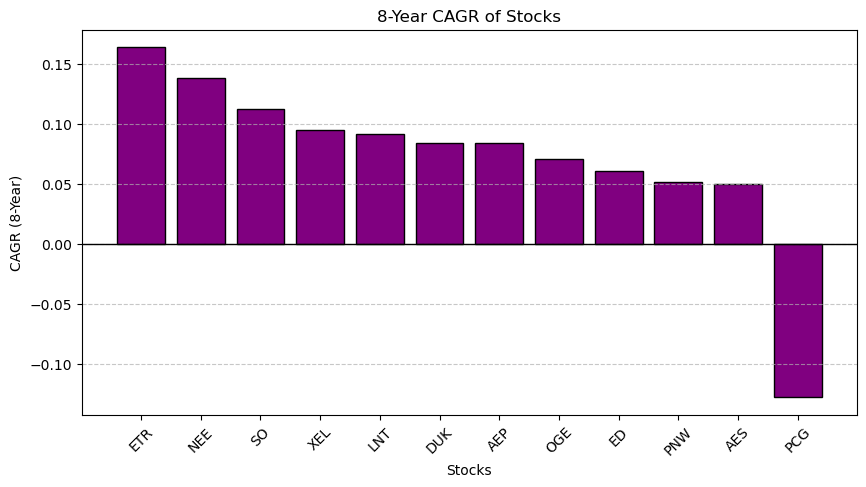

In [46]:
import matplotlib.pyplot as plt

# Sort CAGR values for better visualization
cagr_df = cagr_df.sort_values(by="CAGR", ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(cagr_df["Stock"], cagr_df["CAGR"], color="purple", edgecolor="black")

# Labels and title
plt.ylabel("CAGR (8-Year)")
plt.xlabel("Stocks")
plt.title("8-Year CAGR of Stocks")
plt.axhline(y=0, color="black", linewidth=1)  # Reference line at 0%
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show plot
plt.show()


In [47]:
#Returns with Dividends
# List of stock tickers
tickers = ['NEE', 'PCG', 'PNW', 'DUK', 'XEL', 'LNT', 'SO', 'ED', 'AES', 'AEP', 'ETR', 'OGE']

# Date range
start_date = "2017-01-01"
end_date = "2025-01-01"

# Fetch adjusted closing prices (includes dividends and splits)
close = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True, interval="1mo")["Close"]

# Fetch dividends and remove timezone awareness
dividends = {ticker: yf.Ticker(ticker).dividends.tz_localize(None) for ticker in tickers}

# Convert dividends to DataFrame and resample annually
div_df = pd.DataFrame({ticker: div.resample("YE").sum() for ticker, div in dividends.items()})

# Resample prices to get year-end prices
annual_prices = close.resample("YE").last()

# Calculate total return = (Price Change + Dividends) / Initial Price
total_return = (annual_prices.diff() + div_df) / annual_prices.shift(1)

# Drop NaN values and display results
total_return = total_return.dropna()
print(total_return)

[*********************100%***********************]  12 of 12 completed


                 AEP       AES       DUK        ED       ETR       LNT  \
Date                                                                     
2018-12-31  0.098384  0.451668  0.132562 -0.022351  0.261870  0.063242   
2019-12-31  0.350467  0.468187  0.158899  0.274043  0.559302  0.375167   
2020-12-31 -0.053751  0.255681  0.099509 -0.128925 -0.077641  0.001174   
2021-12-31  0.149010  0.089030  0.241584  0.279663  0.267582  0.264555   
2022-12-31  0.144092  0.246088  0.063507  0.198024  0.119395 -0.043312   
2023-12-31 -0.070960 -0.283541  0.026971  0.025563  0.024222 -0.002856   
2024-12-31  0.227985 -0.265915  0.200414  0.053579  0.663840  0.234527   

                 NEE       OGE       PCG       PNW        SO       XEL  
Date                                                                    
2018-12-31  0.176948  0.295942 -0.470221  0.080385  0.029573  0.098348  
2019-12-31  0.460268  0.225274 -0.542316  0.136359  0.588579  0.365344  
2020-12-31  0.326867 -0.204171  0.146274 

In [48]:
# Merge the two datasets by aligning on the year
merged_returns = annual_returns_df.join(total_return, lsuffix="_price", rsuffix="_total")

# Calculate the difference between total return (with dividends) and price return (without dividends)
diff_returns = merged_returns.filter(like="_total") - merged_returns.filter(like="_price")
diff_returns.columns = [col.replace("_total", "") for col in diff_returns.columns]  # Clean column names
print(merged_returns.dropna())


            NEE_price  PCG_price  PNW_price  DUK_price  XEL_price  LNT_price  \
Date                                                                           
2018-12-31   0.143038  -0.470221   0.035768   0.074159   0.058640   0.023698   
2019-12-31   0.426859  -0.542316   0.090628   0.102882   0.325368   0.334262   
2020-12-31   0.300643   0.146274  -0.076808   0.047715   0.077528  -0.031642   
2021-12-31   0.233926  -0.025682  -0.077750   0.191113   0.043749   0.228615   
2022-12-31  -0.085441   0.339374   0.130052   0.020265   0.064460  -0.074379   
2023-12-31  -0.252930   0.108856  -0.011787  -0.016264  -0.088159  -0.038379   
2024-12-31   0.214646   0.121766   0.234554   0.155598   0.132671   0.195384   

            SO_price  ED_price  AES_price  AEP_price  ...  DUK_total  \
Date                                                  ...              
2018-12-31 -0.037519 -0.066211   0.390206   0.053844  ...   0.132562   
2019-12-31  0.516528  0.225432   0.421595   0.305195  ...   0.1

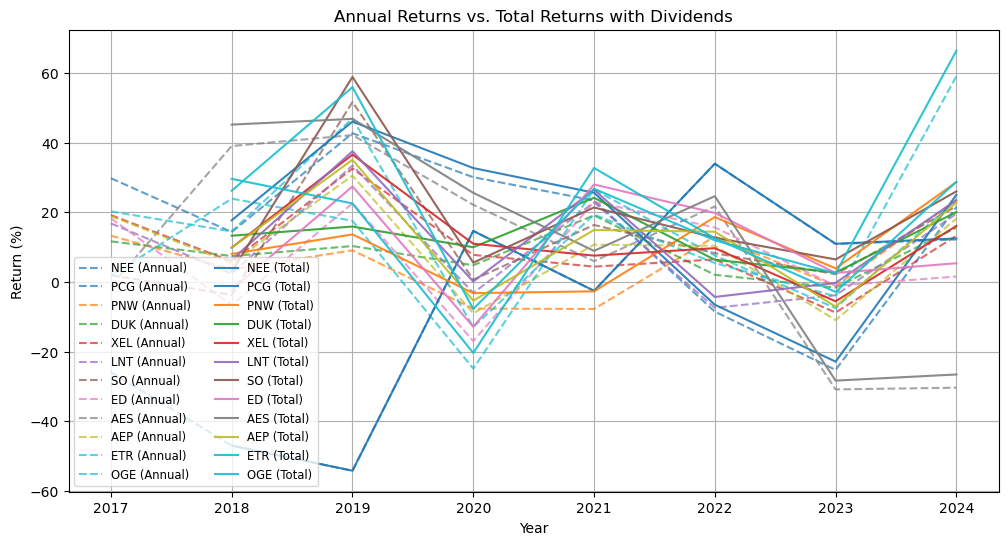

In [49]:
annual_returns_df.index = annual_returns_df.index.year
total_return.index = total_return.index.year

# Define colors for each stock using a colormap
stocks = annual_returns_df.columns
colors = plt.cm.tab10(np.linspace(0, 1, len(stocks)))  # Choose distinct colors

plt.figure(figsize=(12, 6))

# Plot Annual Returns (Dashed Line)
for stock, color in zip(stocks, colors):
    plt.plot(annual_returns_df.index, annual_returns_df[stock] * 100, linestyle='--', alpha=0.7, color=color, label=f'{stock} (Annual)')

# Plot Total Returns (Solid Line)
for stock, color in zip(stocks, colors):
    plt.plot(total_return.index, total_return[stock] * 100, linestyle='-', alpha=0.9, color=color, label=f'{stock} (Total)')

# Formatting
plt.xlabel('Year')
plt.ylabel('Return (%)')
plt.title('Annual Returns vs. Total Returns with Dividends')
plt.legend(loc='best', fontsize='small', ncol=2)
plt.grid(True)

# Show plot
plt.show()

In [149]:
difference = abs(total_return-annual_returns_df)
difference.dropna()

,AEP,AES,DUK,ED,ETR,LNT,NEE,OGE,PCG,PNW,SO,XEL
Date,,,,,,,,,,,,
2018,0.044541,0.061462,0.058404,0.043860,0.116997,0.039544,0.033911,0.056879,5.551115e-17,0.044617,0.067092,0.039708
2019,0.045272,0.046592,0.056016,0.048612,0.089642,0.040905,0.033409,0.049910,1.110223e-16,0.045731,0.072051,0.039976
2020,0.036350,0.034209,0.051794,0.041009,0.052012,0.032816,0.026224,0.044869,1.942890e-16,0.044478,0.049055,0.032024
2021,0.042200,0.029574,0.050471,0.050051,0.074159,0.035939,0.022179,0.061731,2.810252e-16,0.050618,0.050285,0.031655
2022,0.040288,0.029208,0.043242,0.041492,0.065343,0.031067,0.019842,0.049536,1.110223e-16,0.056118,0.044544,0.032315
2023,0.038802,0.025218,0.043235,0.036785,0.065638,0.035523,0.023890,0.046493,6.171574e-04,0.050532,0.042372,0.032349
2024,0.046173,0.038020,0.044816,0.038121,0.073124,0.039143,0.035190,0.050740,3.061142e-03,0.052018,0.042647,0.028040


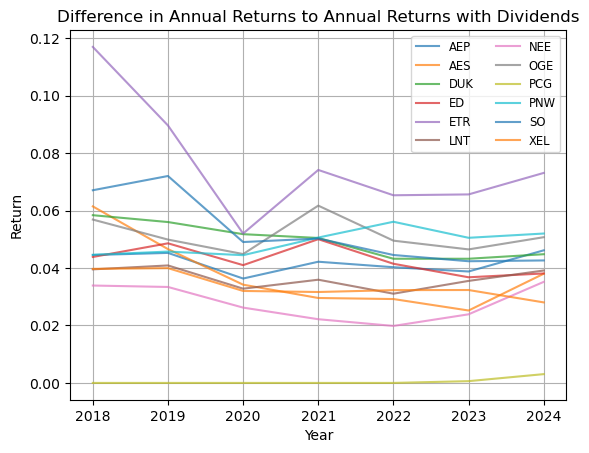

In [161]:
for stock in difference.columns:
    plt.plot(difference.index, difference[stock], alpha=0.7, label=f'{stock}')
plt.xlabel('Year')
plt.ylabel('Return')
plt.title('Difference in Annual Returns to Annual Returns with Dividends')
plt.legend(loc='best', fontsize='small', ncol=2)
plt.grid(True)

# Show plot
plt.show()

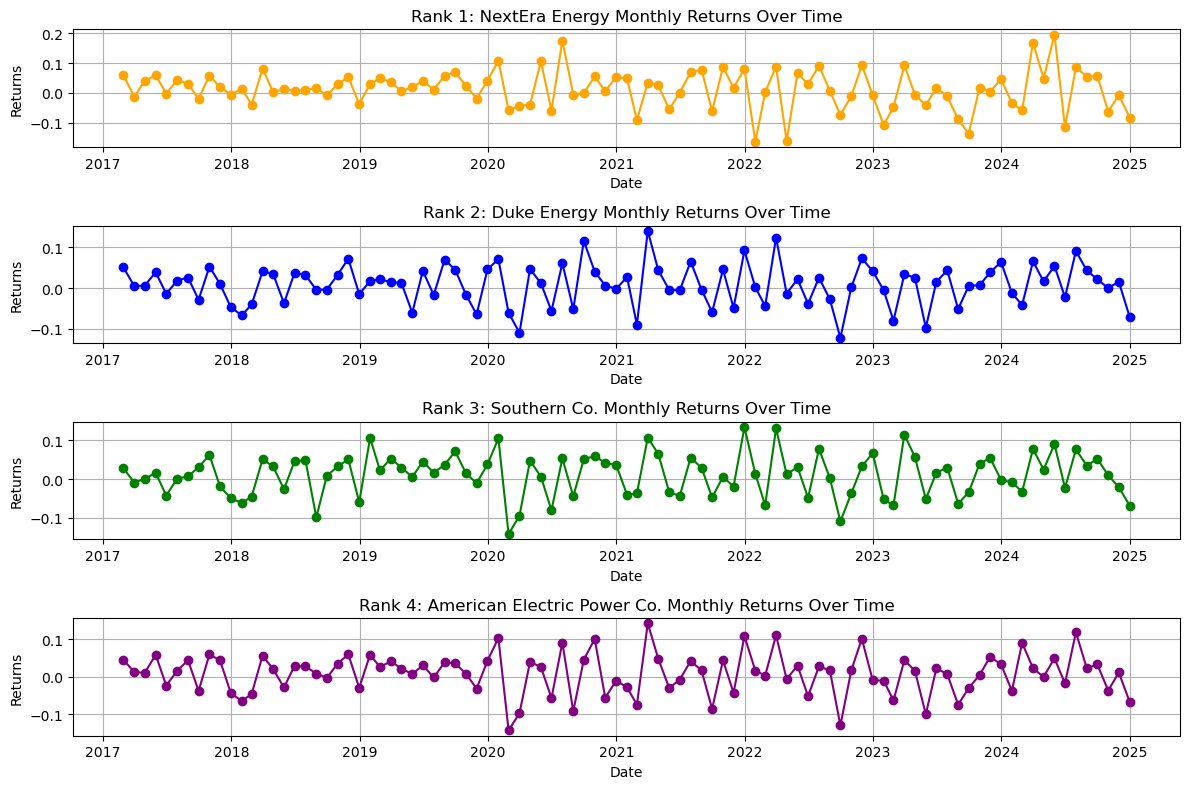

In [52]:
# Large market cap returns

plt.figure(figsize=(12, 8))

plt.subplot(4,1,1)
plt.plot(monthly_returns.index, df_monthly['NEE'], marker='o',color='orange')
plt.title('Rank 1: NextEra Energy Monthly Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(monthly_returns.index, monthly_returns['DUK'], marker='o', color='blue')
plt.title('Rank 2: Duke Energy Monthly Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(monthly_returns.index, monthly_returns['SO'], marker='o', color='green')
plt.title('Rank 3: Southern Co. Monthly Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(monthly_returns.index,monthly_returns['AEP'],marker='o', color='purple')
plt.title('Rank 4: American Electric Power Co. Monthly Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)


plt.tight_layout()
plt.show()

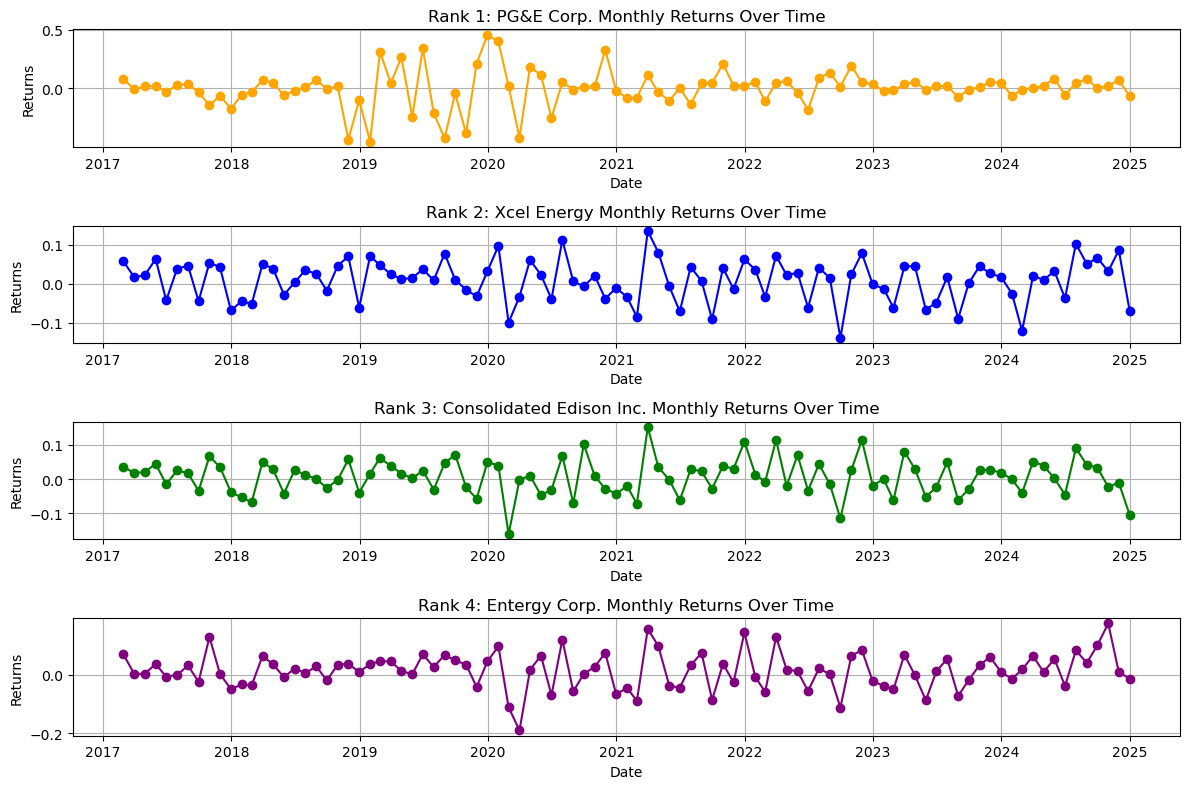

In [53]:
# Mid market cap returns

plt.figure(figsize=(12, 8))

plt.subplot(4,1,1)
plt.plot(monthly_returns.index, monthly_returns['PCG'], marker='o',color='orange')
plt.title('Rank 1: PG&E Corp. Monthly Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(monthly_returns.index, monthly_returns['XEL'], marker='o', color='blue')
plt.title('Rank 2: Xcel Energy Monthly Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(monthly_returns.index, monthly_returns['ED'], marker='o', color='green')
plt.title('Rank 3: Consolidated Edison Inc. Monthly Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(monthly_returns.index,monthly_returns['ETR'],marker='o', color='purple')
plt.title('Rank 4: Entergy Corp. Monthly Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)


plt.tight_layout()
plt.show()

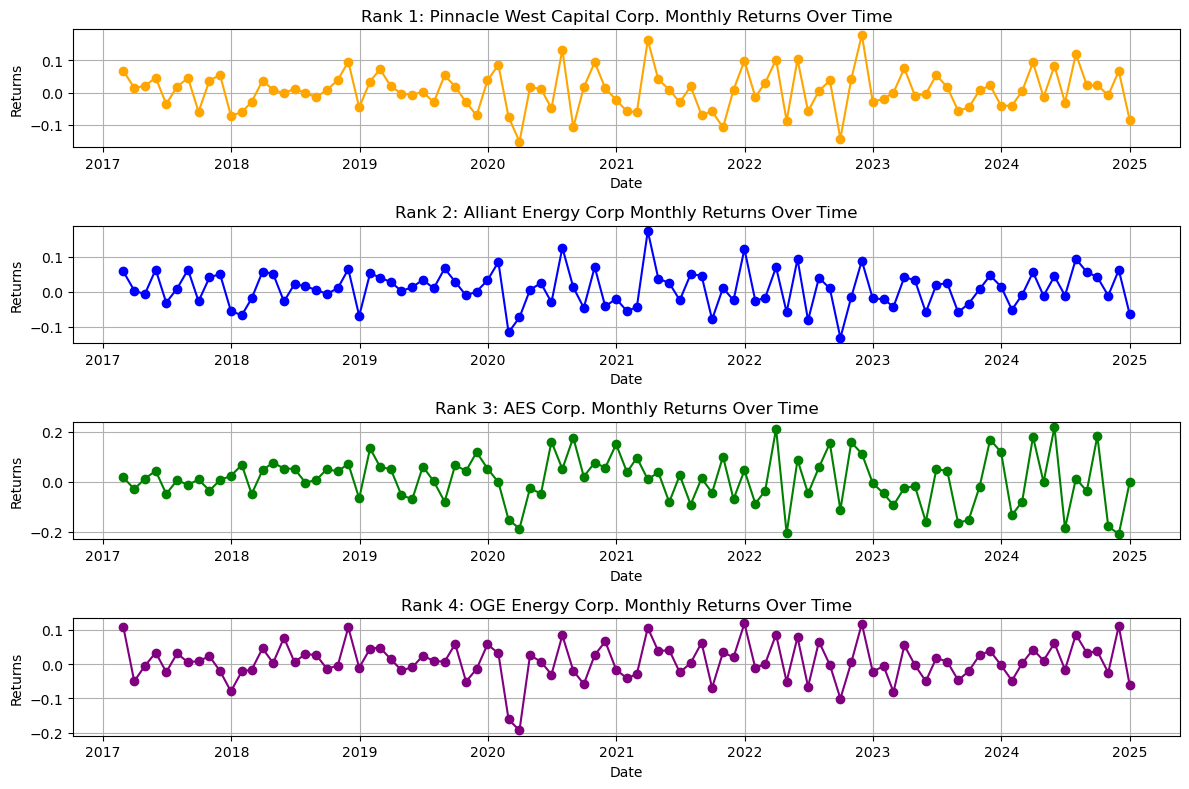

In [54]:
# Small market cap returns

plt.figure(figsize=(12, 8))

plt.subplot(4,1,1)
plt.plot(monthly_returns.index, monthly_returns['PNW'], marker='o',color='orange')
plt.title('Rank 1: Pinnacle West Capital Corp. Monthly Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(monthly_returns.index, monthly_returns['LNT'], marker='o', color='blue')
plt.title('Rank 2: Alliant Energy Corp Monthly Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(monthly_returns.index, monthly_returns['AES'], marker='o', color='green')
plt.title('Rank 3: AES Corp. Monthly Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(monthly_returns.index,monthly_returns['OGE'],marker='o', color='purple')
plt.title('Rank 4: OGE Energy Corp. Monthly Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)


plt.tight_layout()
plt.show()

In [55]:
# Download Risk-Free Rate from FRED (TB3MS)
# TB3MS = 3-month T-bill
# Convert from percent/year to decimal/month
start_date=2017
end_date=2025
rf_data = web.DataReader("TB3MS", "fred", start_date, end_date).dropna()   # daily or monthly data
rf_data["rf"] = rf_data["TB3MS"] / 100.0 / 12.0                  # annual % to monthly decimal

# We resample to get the last available value each month
rf_data = rf_data.resample("ME").last()

rf_series = rf_data["rf"].squeeze()   # ensures shape is (N,) rather than (N,1)

print("Risk-free series shape:", rf_series.shape)
rf_series.head()


Risk-free series shape: (97,)


DATE
2017-01-31    0.000425
2017-02-28    0.000433
2017-03-31    0.000617
2017-04-30    0.000667
2017-05-31    0.000742
Freq: ME, Name: rf, dtype: float64

In [56]:
rf_data.columns

Index(['TB3MS', 'rf'], dtype='object')

In [57]:
# Join monthly returns with the monthly risk-free series
df = df_monthly.join(rf_series, how="inner")

df.rename(columns={"rf": "RF"}, inplace=True)
df.head(10)

df.head(10)


,AEP,AES,DUK,ED,ETR,LNT,NEE,OGE,PCG,PNW,SO,XEL,SP500,RF
2017-02-28,0.045426,0.017706,0.051057,0.036180,0.070073,0.057622,0.058842,0.108027,0.078526,0.067851,0.028121,0.057841,0.037198,0.000433
2017-03-31,0.011726,-0.029514,0.004463,0.017440,0.003045,0.003293,-0.012562,-0.050231,-0.005843,0.014479,-0.008986,0.016930,-0.000389,0.000617
2017-04-30,0.010428,0.011628,0.005975,0.020860,0.003950,-0.007321,0.040430,-0.005718,0.017804,0.020509,0.000402,0.021956,0.009091,0.000667
2017-05-31,0.058234,0.043652,0.038545,0.044274,0.036716,0.063049,0.059000,0.033314,0.019836,0.046257,0.016265,0.063485,0.011576,0.000742
2017-06-30,-0.023762,-0.048801,-0.014253,-0.015291,-0.006557,-0.031348,-0.002264,-0.023576,-0.029395,-0.036106,-0.042810,-0.042371,0.004814,0.000817
2017-07-31,0.015402,0.006301,0.018304,0.025242,-0.000651,0.008962,0.042532,0.030756,0.028016,0.018436,0.001044,0.039097,0.019349,0.000892
2017-08-31,0.043805,-0.012523,0.025611,0.017016,0.031934,0.062718,0.030255,0.004886,0.039740,0.045230,0.006885,0.046291,0.000546,0.000842
2017-09-30,-0.038091,0.009019,-0.028769,-0.034563,-0.024411,-0.027375,-0.019923,0.008678,-0.032538,-0.060131,0.030434,-0.044040,0.019303,0.000858
2017-10-31,0.059368,-0.035390,0.052312,0.066559,0.129649,0.040654,0.058137,0.022481,-0.144896,0.037252,0.062271,0.054212,0.022188,0.000892
2017-11-30,0.043274,0.006542,0.009852,0.034747,0.002550,0.050327,0.019153,-0.020334,-0.061104,0.055057,-0.019157,0.042205,0.028083,0.001025


In [58]:
#CAPM for Largest Market Cap
df["Excess_NEE"]  = df["NEE"]  - df["RF"]
df["Excess_DUK"] = df["DUK"] - df["RF"]
df["Excess_SO"] = df["SO"] - df["RF"]
df["Excess_AEP"] = df["AEP"] - df["RF"]
df["Excess_SP500"] = df["SP500"] - df["RF"]
df["Excess_XEL"] = df["XEL"] - df["RF"]
df["Excess_ED"] = df["ED"] - df["RF"]
df["Excess_PCG"] = df["PCG"] - df["RF"]
df["Excess_ETR"] = df["ETR"] - df["RF"]
df["Excess_LNT"] = df["LNT"] - df["RF"]
df["Excess_PNW"] = df["PNW"] - df["RF"]
df["Excess_AES"] = df["AES"] - df["RF"]
df["Excess_OGE"] = df["OGE"] - df["RF"]

X = df["Excess_SP500"]
a = df["Excess_NEE"]
b = df["Excess_DUK"]
c = df["Excess_SO"]
d = df["Excess_AEP"]
e = df["Excess_XEL"]
f = df["Excess_ED"]
g = df["Excess_PCG"]
h = df["Excess_ETR"]
i = df["Excess_LNT"]
j = df["Excess_PNW"]
k = df["Excess_AES"]
l = df["Excess_OGE"]
# Add intercept
X = sm.add_constant(X)
capm_model1 = sm.OLS(a, X).fit()
capm_model2 = sm.OLS(b, X).fit()
capm_model3 = sm.OLS(c, X).fit()
capm_model4 = sm.OLS(d, X).fit()
capm_model5 = sm.OLS(e, X).fit()
capm_model6 = sm.OLS(f, X).fit()
capm_model7 = sm.OLS(g, X).fit()
capm_model8 = sm.OLS(h, X).fit()
capm_model9 = sm.OLS(i, X).fit()
capm_model10 = sm.OLS(j, X).fit()
capm_model11 = sm.OLS(k, X).fit()
capm_model12 = sm.OLS(l, X).fit()

print("Nextera Energy Summary:",capm_model1.summary()) 
print("Duke Energy Summary:",capm_model2.summary())
print("Southern Co Summary:",capm_model3.summary())
print("American Electric Power Co Summary:",capm_model4.summary())
print("Excel Energy Inc Summary:",capm_model5.summary())
print("Consolidated Edison Inc Summary:",capm_model6.summary())
print("PG&E Corp Summary:",capm_model7.summary())
print("Entergy Corp Summary:",capm_model8.summary())
print("Alliant Energy Corp Summary:",capm_model9.summary())
print("Pinnacle West Capital Corp Summary:",capm_model10.summary())
print("AES Corp Summary:",capm_model11.summary())
print("OGE Energy Corp Summary:",capm_model12.summary())

Nextera Energy Summary:                             OLS Regression Results                            
Dep. Variable:             Excess_NEE   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     13.03
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           0.000496
Time:                        12:58:54   Log-Likelihood:                 131.31
No. Observations:                  95   AIC:                            -258.6
Df Residuals:                      93   BIC:                            -253.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0067 

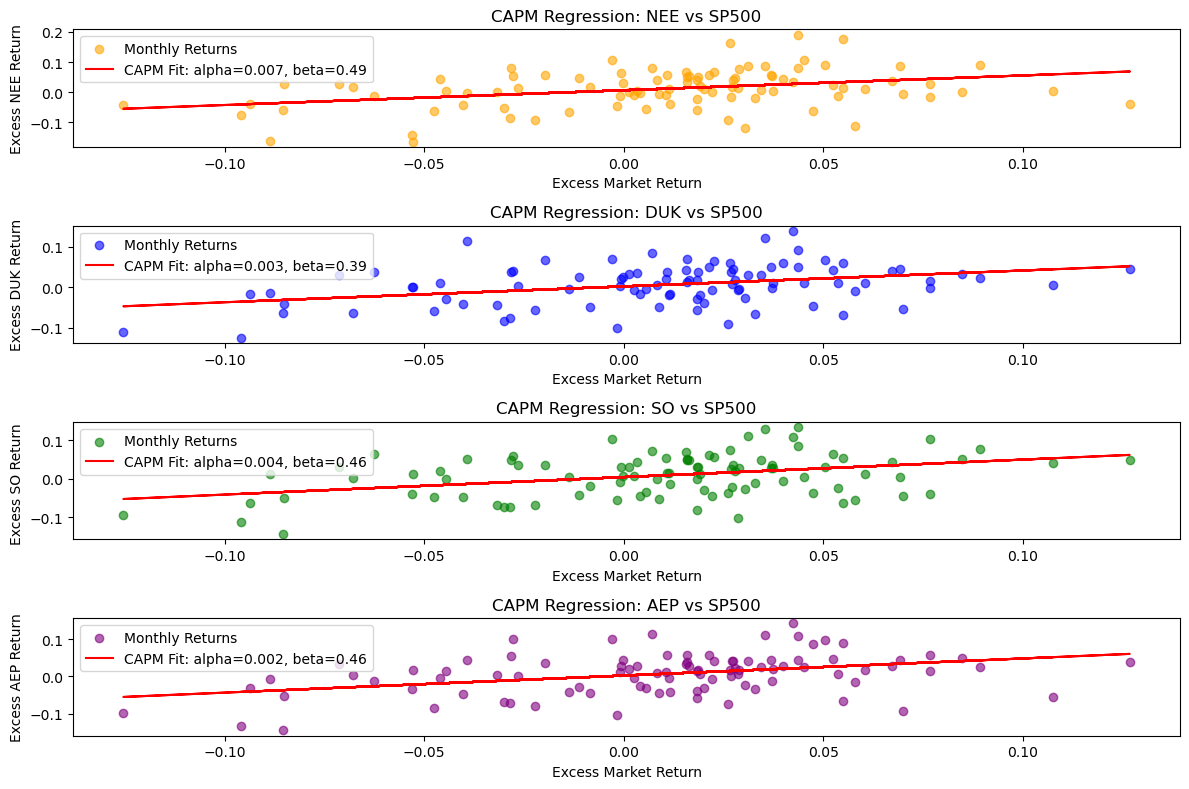

In [59]:
# Larget Market Cap results
alpha_nee, beta_nee = capm_model1.params
alpha_duk, beta_duk = capm_model2.params
alpha_so, beta_so = capm_model3.params
alpha_aep, beta_aep = capm_model4.params

plt.figure(figsize=(12, 8))

plt.subplot(4,1,1)
plt.scatter(df["Excess_SP500"],df["Excess_NEE"], alpha=0.6, label="Monthly Returns",color="orange")
reg_line=alpha_nee+beta_nee*df["Excess_SP500"]
plt.plot(df["Excess_SP500"],reg_line,color="red",label=f"CAPM Fit: alpha={alpha_nee:.3f}, beta={beta_nee:.2f}")
plt.legend()
plt.title("CAPM Regression: NEE vs SP500")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess NEE Return")


plt.subplot(4,1,2)
plt.scatter(df["Excess_SP500"],df["Excess_DUK"], alpha=0.6, label="Monthly Returns",color="blue")
reg_line=alpha_duk+beta_duk*df["Excess_SP500"]
plt.plot(df["Excess_SP500"],reg_line,color="red",label=f"CAPM Fit: alpha={alpha_duk:.3f}, beta={beta_duk:.2f}")
plt.legend()
plt.title("CAPM Regression: DUK vs SP500")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess DUK Return")


plt.subplot(4,1,3)
plt.scatter(df["Excess_SP500"],df["Excess_SO"], alpha=0.6, label="Monthly Returns",color="green")
reg_line=alpha_so+beta_so*df["Excess_SP500"]
plt.plot(df["Excess_SP500"],reg_line,color="red",label=f"CAPM Fit: alpha={alpha_so:.3f}, beta={beta_so:.2f}")
plt.legend()
plt.title("CAPM Regression: SO vs SP500")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess SO Return ")


plt.subplot(4,1,4)
plt.scatter(df["Excess_SP500"],df["Excess_AEP"], alpha=0.6, label="Monthly Returns",color="purple")
reg_line=alpha_aep+beta_aep*df["Excess_SP500"]
plt.plot(df["Excess_SP500"],reg_line,color="red",label=f"CAPM Fit: alpha={alpha_aep:.3f}, beta={beta_aep:.2f}")
plt.legend()
plt.title("CAPM Regression: AEP vs SP500")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess AEP Return")



plt.tight_layout()
plt.show()

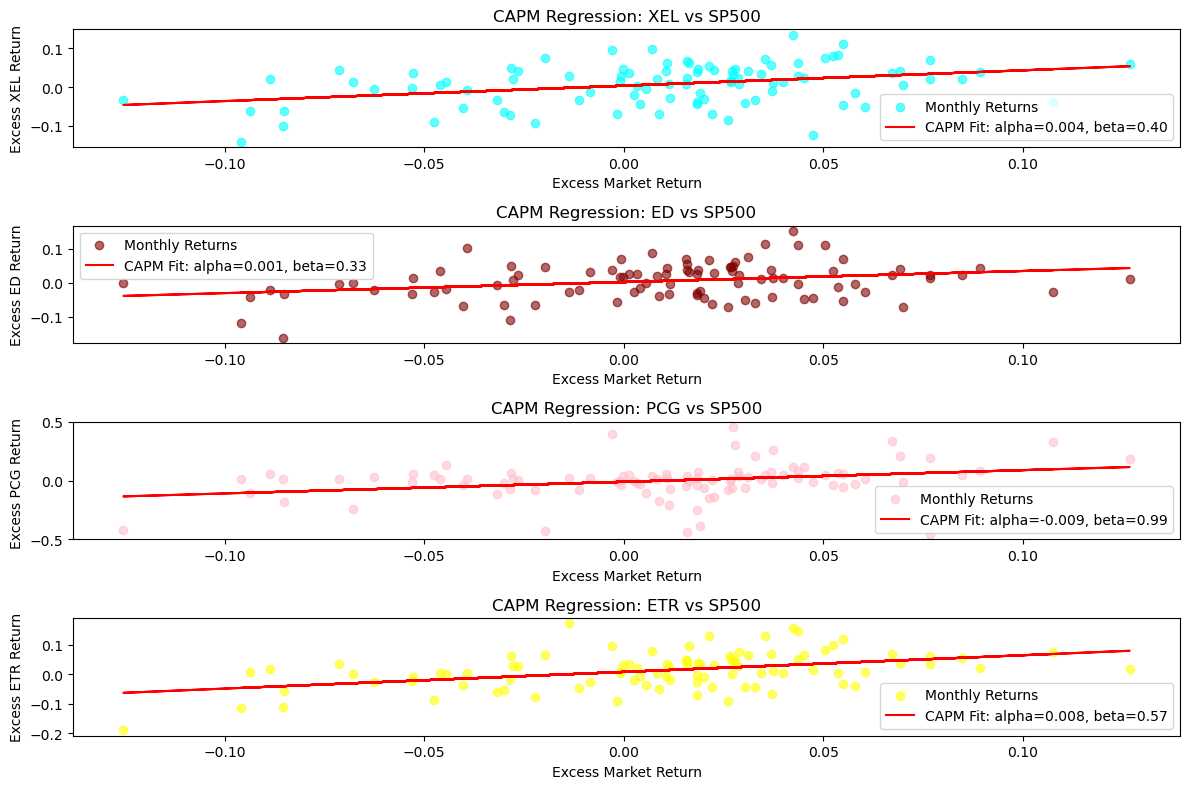

In [60]:
# Mid Market Cap results
alpha_nee, beta_nee = capm_model5.params
alpha_duk, beta_duk = capm_model6.params
alpha_so, beta_so = capm_model7.params
alpha_aep, beta_aep = capm_model8.params

plt.figure(figsize=(12, 8))

plt.subplot(4,1,1)
plt.scatter(df["Excess_SP500"],df["Excess_XEL"], alpha=0.6, label="Monthly Returns",color="aqua")
reg_line=alpha_nee+beta_nee*df["Excess_SP500"]
plt.plot(df["Excess_SP500"],reg_line,color="red",label=f"CAPM Fit: alpha={alpha_nee:.3f}, beta={beta_nee:.2f}")
plt.legend()
plt.title("CAPM Regression: XEL vs SP500")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess XEL Return")


plt.subplot(4,1,2)
plt.scatter(df["Excess_SP500"],df["Excess_ED"], alpha=0.6, label="Monthly Returns",color="maroon")
reg_line=alpha_duk+beta_duk*df["Excess_SP500"]
plt.plot(df["Excess_SP500"],reg_line,color="red",label=f"CAPM Fit: alpha={alpha_duk:.3f}, beta={beta_duk:.2f}")
plt.legend()
plt.title("CAPM Regression: ED vs SP500")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess ED Return")


plt.subplot(4,1,3)
plt.scatter(df["Excess_SP500"],df["Excess_PCG"], alpha=0.6, label="Monthly Returns",color="pink")
reg_line=alpha_so+beta_so*df["Excess_SP500"]
plt.plot(df["Excess_SP500"],reg_line,color="red",label=f"CAPM Fit: alpha={alpha_so:.3f}, beta={beta_so:.2f}")
plt.legend()
plt.title("CAPM Regression: PCG vs SP500")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess PCG Return ")


plt.subplot(4,1,4)
plt.scatter(df["Excess_SP500"],df["Excess_ETR"], alpha=0.6, label="Monthly Returns",color="yellow")
reg_line=alpha_aep+beta_aep*df["Excess_SP500"]
plt.plot(df["Excess_SP500"],reg_line,color="red",label=f"CAPM Fit: alpha={alpha_aep:.3f}, beta={beta_aep:.2f}")
plt.legend()
plt.title("CAPM Regression: ETR vs SP500")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess ETR Return")



plt.tight_layout()
plt.show()

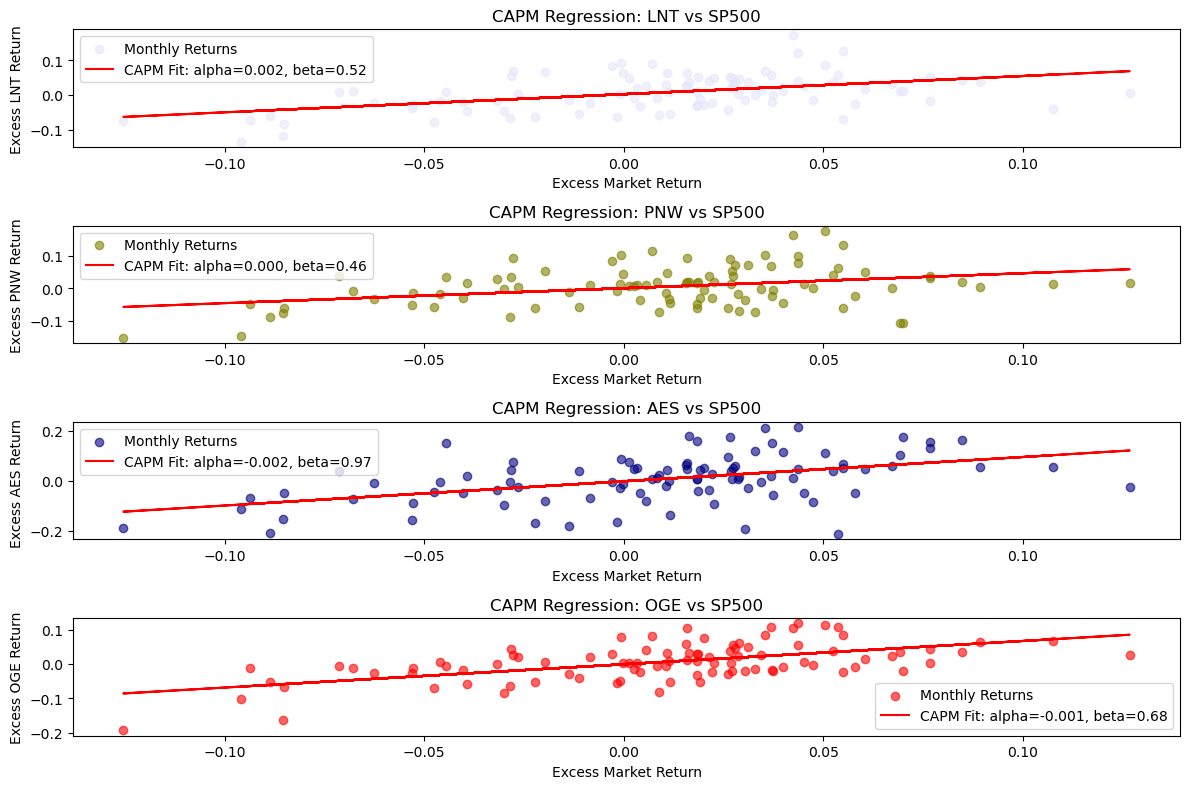

In [61]:
# Small Market Cap results
alpha_nee, beta_nee = capm_model9.params
alpha_duk, beta_duk = capm_model10.params
alpha_so, beta_so = capm_model11.params
alpha_aep, beta_aep = capm_model12.params

plt.figure(figsize=(12, 8))

plt.subplot(4,1,1)
plt.scatter(df["Excess_SP500"],df["Excess_LNT"], alpha=0.6, label="Monthly Returns",color="lavender")
reg_line=alpha_nee+beta_nee*df["Excess_SP500"]
plt.plot(df["Excess_SP500"],reg_line,color="red",label=f"CAPM Fit: alpha={alpha_nee:.3f}, beta={beta_nee:.2f}")
plt.legend()
plt.title("CAPM Regression: LNT vs SP500")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess LNT Return")


plt.subplot(4,1,2)
plt.scatter(df["Excess_SP500"],df["Excess_PNW"], alpha=0.6, label="Monthly Returns",color="olive")
reg_line=alpha_duk+beta_duk*df["Excess_SP500"]
plt.plot(df["Excess_SP500"],reg_line,color="red",label=f"CAPM Fit: alpha={alpha_duk:.3f}, beta={beta_duk:.2f}")
plt.legend()
plt.title("CAPM Regression: PNW vs SP500")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess PNW Return")


plt.subplot(4,1,3)
plt.scatter(df["Excess_SP500"],df["Excess_AES"], alpha=0.6, label="Monthly Returns",color="navy")
reg_line=alpha_so+beta_so*df["Excess_SP500"]
plt.plot(df["Excess_SP500"],reg_line,color="red",label=f"CAPM Fit: alpha={alpha_so:.3f}, beta={beta_so:.2f}")
plt.legend()
plt.title("CAPM Regression: AES vs SP500")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess AES Return ")


plt.subplot(4,1,4)
plt.scatter(df["Excess_SP500"],df["Excess_OGE"], alpha=0.6, label="Monthly Returns",color="red")
reg_line=alpha_aep+beta_aep*df["Excess_SP500"]
plt.plot(df["Excess_SP500"],reg_line,color="red",label=f"CAPM Fit: alpha={alpha_aep:.3f}, beta={beta_aep:.2f}")
plt.legend()
plt.title("CAPM Regression: OGE vs SP500")
plt.xlabel("Excess Market Return")
plt.ylabel("Excess OGE Return")



plt.tight_layout()
plt.show()

In [62]:
# Excess Performance of Green vs. Brown Assets
large_green = returns[['NEE', 'DUK']].mean(axis=1)
large_brown = returns[['SO', 'AEP']].mean(axis=1)
middle_green = returns[['XEL', 'PCG']].mean(axis=1)
middle_brown = returns[['ED', 'ETR']].mean(axis=1)
small_green = returns[['LNT', 'PNW']].mean(axis=1)
small_brown = returns[['AES', 'OGE']].mean(axis=1)

green_vs_brown = pd.DataFrame({
    'Large Green - Brown': large_green - large_brown,
    'Mid Green - Brown': middle_green - middle_brown,
    'Small Green - Brown': small_green - small_brown
})
print("\nExcess Performance of Green vs Brown Assets:\n", green_vs_brown.mean())


Excess Performance of Green vs Brown Assets:
 Large Green - Brown    0.001157
Mid Green - Brown     -0.005067
Small Green - Brown   -0.000545
dtype: float64


<Figure size 1000x500 with 0 Axes>

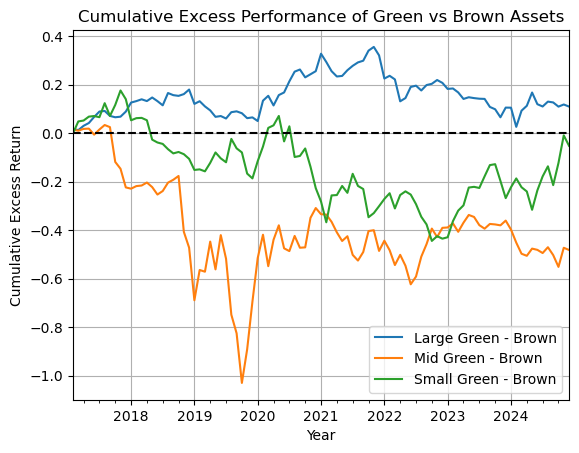

In [63]:
# Plot Excess Performance
plt.figure(figsize=(10,5))
green_vs_brown.cumsum().plot()
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Cumulative Excess Performance of Green vs Brown Assets')
plt.ylabel('Cumulative Excess Return')
plt.xlabel('Year')
plt.legend()
plt.grid()
plt.show()


In [64]:
# Calculate Expected returns
mean_returns=returns.mean()
print("Mean-Expected Returns:\n", mean_returns)

Mean-Expected Returns:
 Ticker
AEP      0.008336
AES      0.008746
DUK      0.008113
ED       0.006342
ETR      0.014794
LNT      0.008795
NEE      0.013064
OGE      0.007304
PCG      0.001912
PNW      0.006165
SO       0.010528
XEL      0.009091
^GSPC    0.011118
dtype: float64


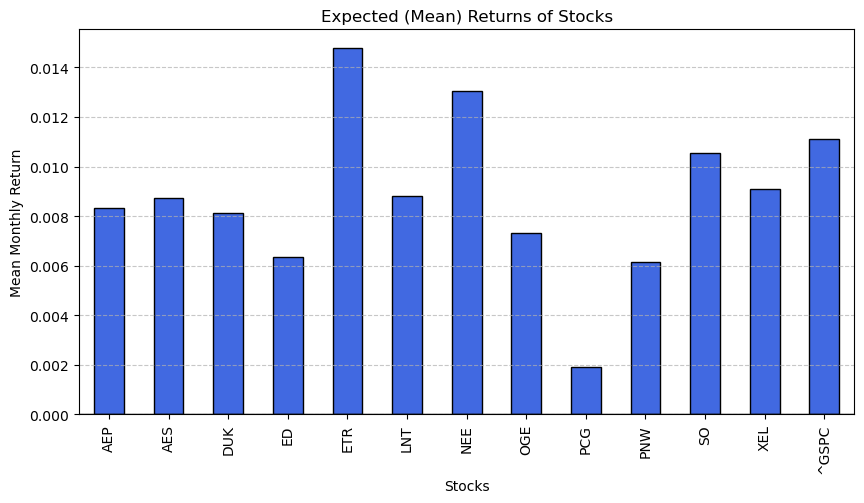

In [65]:
plt.figure(figsize=(10, 5))
mean_returns.plot(kind='bar', color='royalblue', edgecolor='black')

# Labels and title
plt.ylabel("Mean Monthly Return")
plt.xlabel("Stocks")
plt.title("Expected (Mean) Returns of Stocks")
plt.axhline(y=0, color='black', linewidth=1)  # Reference line at 0%
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [66]:
volatility=monthly_returns.std()
volatility

Ticker
AEP      0.054699
AES      0.095934
DUK      0.050353
ED       0.052368
ETR      0.062064
LNT      0.052840
NEE      0.065043
OGE      0.054729
PCG      0.156293
PNW      0.061771
SO       0.055343
XEL      0.053284
^GSPC    0.046735
dtype: float64

In [67]:
betas = {}
for stock in stocks[:-1]:  # Exclude S&P 500
    beta, _ = np.polyfit(monthly_returns['^GSPC'], monthly_returns[stock], 1)
    betas[stock] = beta
beta_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta'])
beta_df

,Beta
NEE,0.484623
PCG,0.995217
PNW,0.464579
DUK,0.390939
XEL,0.394120
LNT,0.520868
SO,0.455211
ED,0.323282
AES,0.958945
AEP,0.456699


In [68]:
green_beta=(0.484623+0.390939+0.394120+0.995217+0.520868+0.464578)/6
green_beta

0.5417241666666667

In [69]:
brown_beta=(0.679136+0.568763+0.958945+0.456699+0.323282+0.455210)/6
brown_beta

0.5736724999999999

In [70]:
#Sharpe Ratio
rf_rate = rf_series.mean()
sharpe_ratios=(mean_returns-rf_rate)/volatility
print("Sharpe Ratios:\n", sharpe_ratios) 

Sharpe Ratios:
 Ticker
AEP      0.118943
AES      0.072098
DUK      0.124785
ED       0.086165
ETR      0.208892
LNT      0.131827
NEE      0.172726
OGE      0.100025
PCG      0.000527
PNW      0.070182
SO       0.157172
XEL      0.136281
^GSPC    0.198755
dtype: float64


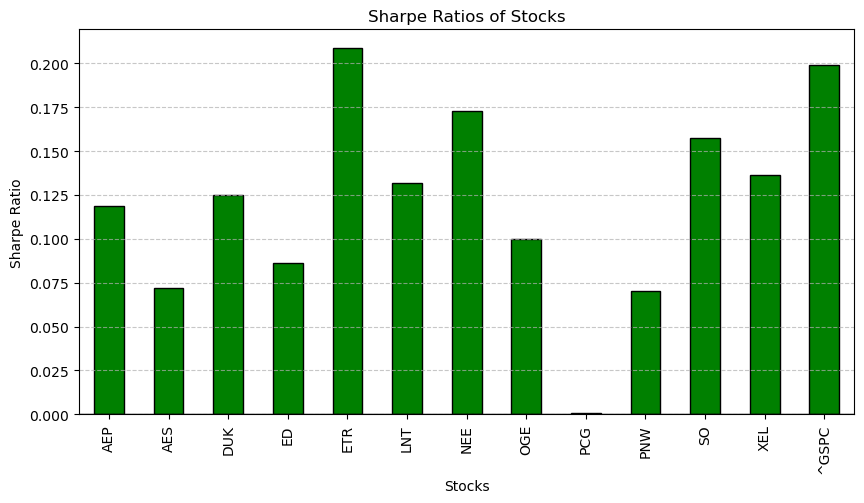

In [71]:
plt.figure(figsize=(10, 5))
sharpe_ratios.plot(kind='bar', color='green', edgecolor='black')

# Labels and title
plt.ylabel("Sharpe Ratio")
plt.xlabel("Stocks")
plt.title("Sharpe Ratios of Stocks")
plt.axhline(y=0, color='black', linewidth=1)  # Reference line at 0%
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [72]:
#Sortino Ratio
neg_returns=monthly_returns.copy()
neg_returns[neg_returns>0] = 0
downside_std=neg_returns.std()
sortino_ratios = (mean_returns - rf_rate) / downside_std
print("Sortino Ratios:\n", sortino_ratios)

Sortino Ratios:
 Ticker
AEP      0.206036
AES      0.123717
DUK      0.222202
ED       0.154271
ETR      0.395596
LNT      0.252132
NEE      0.307462
OGE      0.167475
PCG      0.000792
PNW      0.128434
SO       0.291421
XEL      0.237015
^GSPC    0.343504
dtype: float64


In [73]:
rf_rate

0.0018296391752577322

In [74]:
# Calculate Value at Risk (VaR)
confidence_level = 0.95
VaR = returns.quantile(1 - confidence_level)

# Calculate Conditional Value at Risk (CVaR)
CVaR = returns[returns < VaR].mean()

print("Value at Risk (VaR):\n", VaR)
print("Conditional Value at Risk (CVaR):\n", CVaR)

Value at Risk (VaR):
 Ticker
AEP     -0.088067
AES     -0.168658
DUK     -0.073518
ED      -0.069085
ETR     -0.086486
LNT     -0.070470
NEE     -0.096156
OGE     -0.072342
PCG     -0.291376
PNW     -0.086544
SO      -0.072362
XEL     -0.085853
^GSPC   -0.083977
Name: 0.050000000000000044, dtype: float64
Conditional Value at Risk (CVaR):
 Ticker
AEP     -0.113013
AES     -0.193369
DUK     -0.099540
ED      -0.105262
ETR     -0.118092
LNT     -0.096482
NEE     -0.136733
OGE     -0.123426
PCG     -0.423137
PNW     -0.120548
SO      -0.105481
XEL     -0.107489
^GSPC   -0.096472
dtype: float64


In [75]:
#Variance of Returns
variance=returns.var()
print("Variance of Returns:\n",variance)

Variance of Returns:
 Ticker
AEP      0.002992
AES      0.009203
DUK      0.002535
ED       0.002742
ETR      0.003852
LNT      0.002792
NEE      0.004231
OGE      0.002995
PCG      0.024428
PNW      0.003816
SO       0.003063
XEL      0.002839
^GSPC    0.002184
dtype: float64


In [76]:
#Log Returns
log_returns=np.log(prices/prices.shift(1)).dropna()
log_returns.head()

Ticker,AEP,AES,DUK,ED,ETR,LNT,NEE,OGE,PCG,PNW,SO,XEL,^GSPC
Date,,,,,,,,,,,,,
2017-02-01,0.044425,0.017551,0.049796,0.035541,0.067727,0.056023,0.057176,0.102581,0.075596,0.065648,0.027733,0.056230,0.036523
2017-03-01,0.011658,-0.029958,0.004453,0.017290,0.003040,0.003287,-0.012641,-0.051536,-0.005860,0.014375,-0.009027,0.016788,-0.000389
2017-04-01,0.010374,0.011561,0.005958,0.020645,0.003942,-0.007348,0.039634,-0.005734,0.017647,0.020301,0.000401,0.021719,0.009050
2017-05-01,0.056601,0.042726,0.037821,0.043322,0.036058,0.061142,0.057325,0.032771,0.019642,0.045219,0.016134,0.061551,0.011510
2017-06-01,-0.024049,-0.050032,-0.014356,-0.015410,-0.006578,-0.031850,-0.002266,-0.023858,-0.029835,-0.036774,-0.043753,-0.043295,0.004802


In [77]:
#Covariance between stocks in Largest Market cap
covariance_large=monthly_returns[['AEP','DUK','NEE','SO']].cov()
print("Covariance Matrix:\n",covariance_large)

Covariance Matrix:
 Ticker       AEP       DUK       NEE        SO
Ticker                                        
AEP     0.002992  0.002343  0.002116  0.002378
DUK     0.002343  0.002535  0.001932  0.002237
NEE     0.002116  0.001932  0.004231  0.002164
SO      0.002378  0.002237  0.002164  0.003063


In [78]:
# Covariance between stock in Middle Market Cap
covariance_mid=monthly_returns[['ED','XEL','PCG','ETR']].cov()
print("Covariance Matrix:\n",covariance_mid)

Covariance Matrix:
 Ticker        ED       XEL       PCG       ETR
Ticker                                        
ED      0.002742  0.002215  0.001274  0.002252
XEL     0.002215  0.002839  0.001521  0.002475
PCG     0.001274  0.001521  0.024428  0.002872
ETR     0.002252  0.002475  0.002872  0.003852


In [79]:
covariance_small=monthly_returns[['LNT','PNW','AES','OGE']].cov()
print("Covariance Matrix:\n",covariance_small)

Covariance Matrix:
 Ticker       LNT       PNW       AES       OGE
Ticker                                        
LNT     0.002792  0.002668  0.001945  0.002323
PNW     0.002668  0.003816  0.001873  0.002541
AES     0.001945  0.001873  0.009203  0.002210
OGE     0.002323  0.002541  0.002210  0.002995


In [80]:
#Correlation Matrix large cap
correlation_large=monthly_returns[['AEP','DUK','NEE','SO','^GSPC']].corr()[['^GSPC']]
print("Correlation Matrix:\n",correlation_large)

Correlation Matrix:
 Ticker     ^GSPC
Ticker          
AEP     0.390199
DUK     0.362845
NEE     0.348210
SO      0.384407
^GSPC   1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

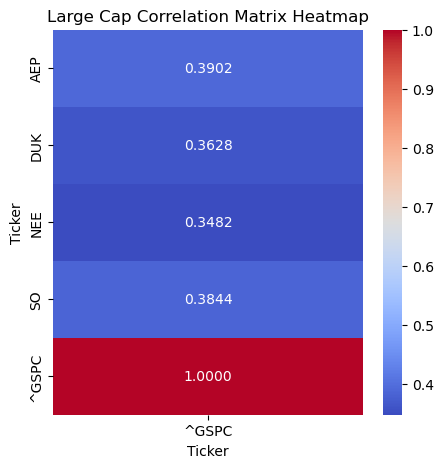

In [81]:
#Correlation heatmap large cap
plt.figure(figsize=(5,5))
sns.heatmap(correlation_large, annot=True,fmt=".4f",cmap="coolwarm")
plt.title("Large Cap Correlation Matrix Heatmap")
plt.show

In [82]:
#Correlation Matrix mid cap
correlation_mid=monthly_returns[['ED','XEL','PCG','ETR','^GSPC']].corr()[['^GSPC']]
print("Correlation Matrix:\n",correlation_mid)

Correlation Matrix:
 Ticker     ^GSPC
Ticker          
ED      0.288504
XEL     0.345678
PCG     0.297588
ETR     0.428049
^GSPC   1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

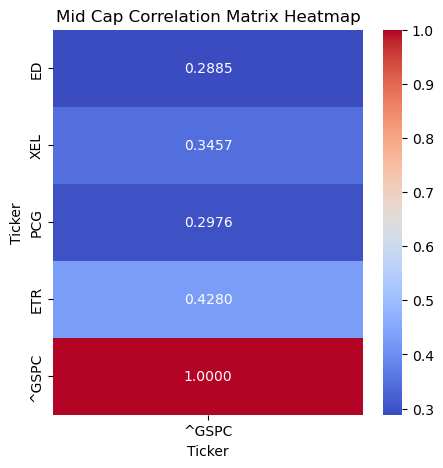

In [83]:
#Correlation mid cap heatmap
plt.figure(figsize=(5,5))
sns.heatmap(correlation_mid, annot=True,fmt=".4f",cmap="coolwarm")
plt.title("Mid Cap Correlation Matrix Heatmap")
plt.show

In [84]:
#Correlation Matrix small cap
correlation_small=monthly_returns[['LNT','PNW','AES','OGE','^GSPC']].corr()[['^GSPC']]
print("Correlation Matrix:\n",correlation_small)

Correlation Matrix:
 Ticker     ^GSPC
Ticker          
LNT     0.460686
PNW     0.351491
AES     0.467155
OGE     0.579929
^GSPC   1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

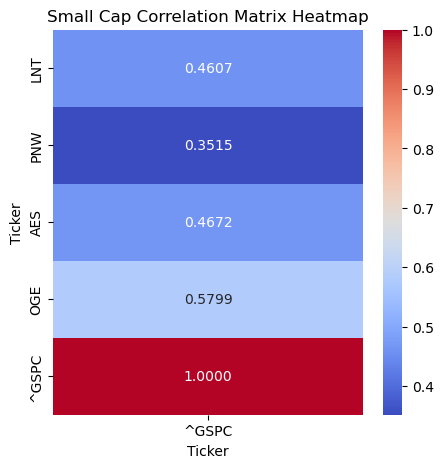

In [85]:
#Correlation small cap heatmap
plt.figure(figsize=(5,5))
sns.heatmap(correlation_small, annot=True,fmt=".4f",cmap="coolwarm")
plt.title("Small Cap Correlation Matrix Heatmap")
plt.show

In [86]:
# Compare performance during market events
# Example: COVID-19 Crash (Feb 2020 - April 2020)
covid_period_large = monthly_returns[['AEP','DUK','NEE','SO']].loc['2020-01':'2022-05']
covid_performance_large = covid_period_large.cumsum()

print(covid_performance_large)


Ticker           AEP       DUK       NEE        SO
Date                                              
2020-01-31  0.102740  0.070387  0.107532  0.105181
2020-02-29 -0.040802  0.009648  0.049963 -0.037433
2020-03-31 -0.138591 -0.099751  0.006905 -0.132413
2020-04-30 -0.099457 -0.053015 -0.032576 -0.084574
2020-05-31 -0.073708 -0.041557  0.073170 -0.078580
2020-06-30 -0.131143 -0.097698  0.012949 -0.159301
2020-07-31 -0.040234 -0.036990  0.188142 -0.106070
2020-08-31 -0.132891 -0.088913  0.182692 -0.150568
2020-09-30 -0.087531  0.026164  0.181938 -0.099241
2020-10-31  0.012799  0.066249  0.236990 -0.039669
2020-11-30 -0.043245  0.072221  0.242180  0.002107
2020-12-31 -0.054279  0.070246  0.295473  0.038953
2021-01-31 -0.082620  0.096896  0.343691 -0.001907
2021-02-28 -0.157519  0.007427  0.252310 -0.039246
2021-03-31 -0.015486  0.146982  0.286696  0.068228
2021-04-30  0.031857  0.190078  0.311826  0.132739
2021-05-31  0.001309  0.185410  0.256478  0.098736
2021-06-30 -0.006757  0.179924 

In [87]:
event_dates = ['2020-03-01', '2022-02-01']  # COVID crash & energy price shock
event_returns = returns.loc[event_dates]
print("\nImpact of Market Events:\n", event_returns)


Impact of Market Events:
 Ticker           AEP       AES       DUK        ED       ETR       LNT  \
Date                                                                     
2020-03-01 -0.097789 -0.187089 -0.109399 -0.002310 -0.190555 -0.073484   
2022-02-01  0.002765 -0.035955 -0.044260 -0.007866 -0.058692 -0.017250   

Ticker           NEE       OGE       PCG       PNW        SO       XEL  \
Date                                                                     
2020-03-01 -0.043058 -0.193438 -0.420000 -0.153090 -0.094979 -0.032413   
2022-02-01  0.001920  0.001119 -0.111024  0.029884 -0.067923 -0.033448   

Ticker         ^GSPC  
Date                  
2020-03-01 -0.125119  
2022-02-01 -0.031360  


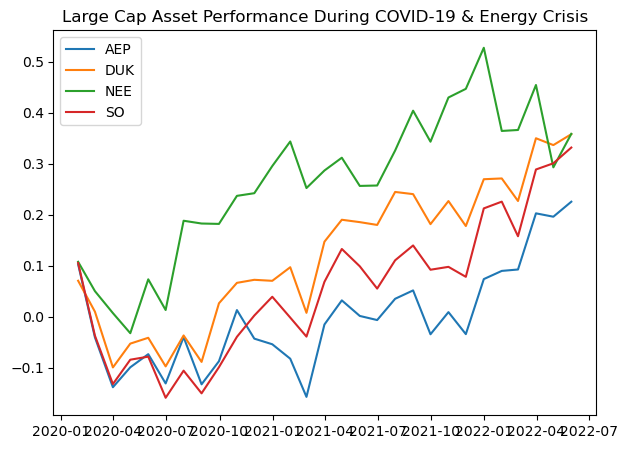

In [88]:
plt.figure(figsize=(7, 5))
for column in covid_performance_large.columns:
    plt.plot(covid_performance_large.index, covid_performance_large[column], label=column)
plt.title('Large Cap Asset Performance During COVID-19 & Energy Crisis')
plt.legend()
plt.show()

In [89]:
# Compare performance during market events
# Example: COVID-19 Crash (Feb 2020 - April 2020)
covid_period_mid = monthly_returns[['ED','XEL','PCG','ETR']].loc['2020-01':'2022-05']
covid_performance_mid = covid_period_mid.cumsum()

print(covid_performance_mid)

Ticker            ED       XEL       PCG       ETR
Date                                              
2020-01-31  0.039018  0.096827  0.399264  0.097830
2020-02-29 -0.122471 -0.002465  0.418330 -0.013256
2020-03-31 -0.124780 -0.034878 -0.001669 -0.203811
2020-04-30 -0.114524  0.026012  0.181868 -0.187422
2020-05-31 -0.161986  0.049139  0.296529 -0.121356
2020-06-30 -0.193487  0.010234  0.044421 -0.191082
2020-07-31 -0.125365  0.122221  0.098536 -0.070413
2020-08-31 -0.196821  0.128449  0.088911 -0.127390
2020-09-30 -0.094941  0.121828  0.102949 -0.124408
2020-10-31 -0.086072  0.142985  0.121054 -0.097106
2020-11-30 -0.114611  0.104859  0.449506 -0.021726
2020-12-31 -0.157959  0.094615  0.430608 -0.088251
2021-01-31 -0.178576  0.060771  0.347944 -0.133423
2021-02-28 -0.251054 -0.023618  0.267454 -0.222797
2021-03-31 -0.099115  0.111559  0.381631 -0.065510
2021-04-30 -0.064222  0.191574  0.348326  0.033213
2021-05-31 -0.066419  0.185684  0.244086 -0.003662
2021-06-30 -0.128653  0.115142 

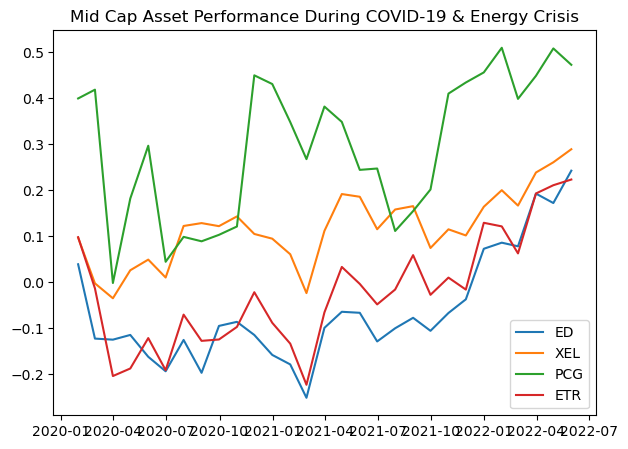

In [90]:
plt.figure(figsize=(7, 5))
for column in covid_performance_mid.columns:
    plt.plot(covid_performance_mid.index, covid_performance_mid[column], label=column)
plt.title('Mid Cap Asset Performance During COVID-19 & Energy Crisis')
plt.legend()
plt.show()

In [91]:
# Example: COVID-19 Crash (Feb 2020 - April 2020)
covid_period_small = monthly_returns[['LNT','PNW','AES','OGE']].loc['2020-01':'2022-05']
covid_performance_small = covid_period_small.cumsum()

print(covid_performance_small)

Ticker           LNT       PNW       AES       OGE
Date                                              
2020-01-31  0.084795  0.086290 -0.002010  0.031032
2020-02-29 -0.031488  0.009670 -0.153643 -0.130582
2020-03-31 -0.104972 -0.143420 -0.340732 -0.324021
2020-04-30 -0.099589 -0.127587 -0.366468 -0.298313
2020-05-31 -0.075219 -0.115767 -0.414318 -0.291545
2020-06-30 -0.106014 -0.165279 -0.254190 -0.322197
2020-07-31  0.019614 -0.031700 -0.203120 -0.238534
2020-08-31  0.032310 -0.140377 -0.026748 -0.257786
2020-09-30 -0.013858 -0.124017 -0.006466 -0.316480
2020-10-31  0.056422 -0.029852  0.070287 -0.290472
2020-11-30  0.014499 -0.016316  0.126236 -0.224704
2020-12-31 -0.005843 -0.039529  0.275942 -0.241067
2021-01-31 -0.061733 -0.098316  0.313815 -0.283127
2021-02-28 -0.105043 -0.158844  0.409995 -0.311928
2021-03-31  0.068267  0.004462  0.419408 -0.206359
2021-04-30  0.105379  0.045027  0.457080 -0.169276
2021-05-31  0.130295  0.054224  0.375409 -0.128424
2021-06-30  0.105973  0.023365 

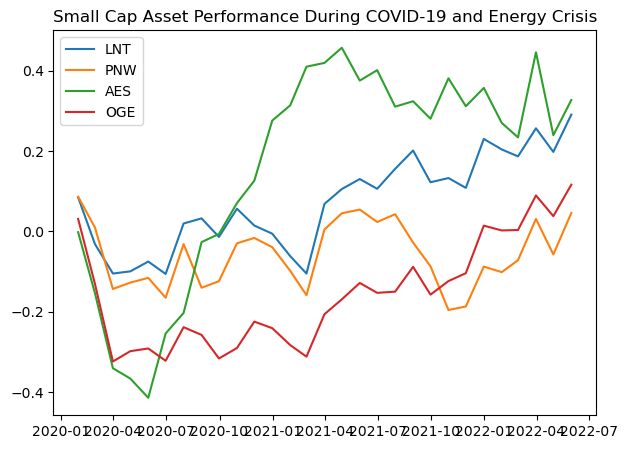

In [92]:
plt.figure(figsize=(7, 5))
for column in covid_performance_small.columns:
    plt.plot(covid_performance_small.index, covid_performance_small[column], label=column)
plt.title('Small Cap Asset Performance During COVID-19 and Energy Crisis')
plt.legend()
plt.show()